# "Worth It" Wines
#### Christopher Yue and Vishal Hundal

# Data Cleansing

In [1]:
from scipy import stats
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
table = pd.read_csv('winemag-data_first150k.csv')
table.drop(['Unnamed: 0'], axis=1, inplace=True)
table = table[['country', 'variety', 'description', 'province', 'region_1', 'region_2', 'winery', 
               'designation', 'price', 'points']]
table = table.dropna()
table

,country,variety,description,province,region_1,region_2,winery,designation,price,points
0,US,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,California,Napa Valley,Napa,Heitz,Martha's Vineyard,235.0,96
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95
11,US,Pinot Noir,"From 18-year-old vines, this supple well-balan...",Oregon,Ribbon Ridge,Willamette Valley,Patricia Green Cellars,Estate Vineyard Wadensvil Block,48.0,95
12,US,Pinot Noir,A standout even in this terrific lineup of 201...,Oregon,Dundee Hills,Willamette Valley,Patricia Green Cellars,Weber Vineyard,48.0,95
14,US,Pinot Noir,"With its sophisticated mix of mineral, acid an...",Oregon,Dundee Hills,Willamette Valley,Domaine Serene,Grace Vineyard,185.0,95
15,US,Chardonnay,"First made in 2006, this succulent luscious Ch...",Oregon,Willamette Valley,Willamette Valley,Bergström,Sigrid,90.0,95
16,US,Cabernet Sauvignon,"This blockbuster, powerhouse of a wine suggest...",California,Diamond Mountain District,Napa,Hall,Rainin Vineyard,325.0,95


# Exploratory Data Analysis

In [3]:
def check_for_dups(df):
    seen = set()
    dups = set()
    num_dups = 0
    for index, row in df.iterrows():
        if row['description'] not in seen:
            seen.add(row['description'])
        else:
            dups.add(row['description'])
            num_dups += 1
            
    return dups, num_dups

Duplicate entries can be an issue for Machine Learning model training later on, and I will explain why when we get to the model training section.
To see if duplicates are an issue, I want to check specifically the description column for duplicate entries, because two wines could coincidentally have other features that perfectly match (e.g. region, price, points). The description, however, must be unique to a review.

In [4]:
dups, num_dups = check_for_dups(table)
dups

{"This is one of those Chardonnays that's delicious from the first sip. It's not complicated, but is rich in mango, yellow peach and oak-inspired buttered toast, butterscotch, honey and vanilla bean flavors. The grapes are from the Oak Knoll District, and the wine has refreshing acidity.",
 'If you smelled this blind you might think it was Sauvignon Blanc. But swirl it, let it breathe, and the rosehip tea comes along. In the mouth, the wine is crisp  with tea, cherry skin and root beer flavors.',
 "Tasted in a flight with far more expensive wines, this Pinot stood proud. It's dry and richly complex, with the silk-and-satin texture you want. The flavors reward with cherries, cola, Canadian bacon, Indian spices and sandalwood. At this price, it's a steal.",
 'Crisp minerality and full fruit flavors of apricot and lemon are the hallmarks of this classic New York Riesling. A plate of freshwater fish or a sampling of cheese and apples would pair perfectly here.',
 'This has the sharp, citru

There seem to be a lot of duplicate descriptions. Let's take a look at exactly how many of those reviews were duplicates.

In [5]:
print('Number of duplicates: ' + str(num_dups))
print('Percentage duplicates: ' + str(num_dups * 100 / len(table)) + '%')

Number of duplicates: 13819
Percentage duplicates: 35.21571825386713%


In [6]:
table.drop_duplicates('description', inplace=True)

In [7]:
dups, num_dups = check_for_dups(table)
num_dups

0

As you can see, approximately 35% of our original data consisted of duplicates. That's a lot of duplicates!
We can take care of this issue by simply dropping all of the rows that contain duplicate descriptions from our data. After running the code above, we are now duplicate-free.

In [8]:
table

,country,variety,description,province,region_1,region_2,winery,designation,price,points
0,US,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,California,Napa Valley,Napa,Heitz,Martha's Vineyard,235.0,96
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95
11,US,Pinot Noir,"From 18-year-old vines, this supple well-balan...",Oregon,Ribbon Ridge,Willamette Valley,Patricia Green Cellars,Estate Vineyard Wadensvil Block,48.0,95
12,US,Pinot Noir,A standout even in this terrific lineup of 201...,Oregon,Dundee Hills,Willamette Valley,Patricia Green Cellars,Weber Vineyard,48.0,95
14,US,Pinot Noir,"With its sophisticated mix of mineral, acid an...",Oregon,Dundee Hills,Willamette Valley,Domaine Serene,Grace Vineyard,185.0,95
15,US,Chardonnay,"First made in 2006, this succulent luscious Ch...",Oregon,Willamette Valley,Willamette Valley,Bergström,Sigrid,90.0,95
16,US,Cabernet Sauvignon,"This blockbuster, powerhouse of a wine suggest...",California,Diamond Mountain District,Napa,Hall,Rainin Vineyard,325.0,95


# INCLUDE HYPOTHESIS TEST HERE
#     NULL HYPOTHESIS: THERE IS A CORRELATION BETWEEN THE PRICE OF A WINE AND THE POINTS IT RECEIVES
#     ALTERNATIVE HYPOTHESIS: THERE IS NO CORRELATION
### THERE ACTUALLY IS A MODERATE CORRELATION, AS I FOUND IT IN THE OTHER JUPYTER NOTEBOOK. HOWEVER, BECAUSE THE PEARSON CORRELATION COEFFICIENT ONLY HAS A VALUE OF .48 SOMETHING, IT MEANS THAT NOT *THAT* MUCH OF THE DATA FITS WELL LINEARLY. OUR GOAL IS TO FIND THOSE WINES/DATA -- THE ONES THAT HAVE HIGH POINTS BUT LOW PRICES.

Now, let's determine how we should actually measure how "worth it" a wine is. We could simply say that the worth it-ness of a wine is measured by the number of points the wine received divided by the price of the wine (price/points). This way, the lower the price and the higher the points, the more worth it a wine is. We can add this quantity as a feature column for our current dataset by calculating this number for each observation. I'm going to call this number the "worth score."

In [9]:
worth_score = (table['points'] / table['price'])
worth_score = (worth_score - worth_score.mean()) / worth_score.std()
worth_score = pd.DataFrame({'worth_score': worth_score})
table = pd.concat([table, worth_score], axis=1)

table = table[['country', 'variety', 'description', 'province', 'region_1', 'region_2', 'winery', 'designation', 'price', 
              'points', 'worth_score']]
table.head()

,country,variety,description,province,region_1,region_2,winery,designation,price,points,worth_score
0,US,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,California,Napa Valley,Napa,Heitz,Martha's Vineyard,235.0,96,-1.521169
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96,-1.157899
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96,-0.931458
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95,-0.939949
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95,-0.872725


In [10]:
print('Lowest worth score: {}'.format(table['worth_score'].min()))
print('Highest worth score: {}'.format(table['worth_score'].max()))

Lowest worth score: -1.7216949588695694
Highest worth score: 9.706331459613148


Now I want to get a sense of the different varieties of wine. Since our end goal is to somehow find where to find the best wines for the lowest prices, wine varieties could potentially be a good place to look for such "deals."

In [11]:
wineries = table['winery'].unique()
for winery in wineries:
    print('Wineries:' + str(winery))

Wineries:Heitz
Wineries:Macauley
Wineries:Ponzi
Wineries:Bergström
Wineries:Blue Farm
Wineries:Patricia Green Cellars
Wineries:Domaine Serene
Wineries:Hall
Wineries:Gary Farrell
Wineries:Center of Effort
Wineries:Comartin
Wineries:Roar
Wineries:Saviah
Wineries:Zepaltas
Wineries:Buty
Wineries:Brandlin
Wineries:DeLille
Wineries:Dr. Konstantin Frank
Wineries:Efeste
Wineries:Jason-Stephens
Wineries:Michael Mondavi Family Estate
Wineries:Panther Creek
Wineries:Provenance Vineyards
Wineries:Raymond
Wineries:Archery Summit
Wineries:B Cellars
Wineries:Bethel Heights
Wineries:Eleven Eleven
Wineries:Franciscan
Wineries:Parducci
Wineries:Hestan
Wineries:Ehret
Wineries:EOS
Wineries:Martinez & Martinez
Wineries:Kuleto Estate
Wineries:Charles Krug
Wineries:Millbrook
Wineries:MacPhail
Wineries:Foursight
Wineries:Goat Bubbles
Wineries:Grgich Hills
Wineries:Navarro
Wineries:Renwood
Wineries:Trinchero
Wineries:Andis
Wineries:Beaucanon
Wineries:Brecon Estate
Wineries:Peachy Canyon
Wineries:Three
Wineries

Wineries:Hocus Pocus
Wineries:Stark
Wineries:Three Rivers
Wineries:Mixed Bag
Wineries:Consilience
Wineries:Domaine Santa Barbara
Wineries:X
Wineries:Rosenblum
Wineries:Del Carlo Winery
Wineries:Q
Wineries:Stonehedge
Wineries:Covey Run
Wineries:Roshambo
Wineries:Sacred Stone
Wineries:Fisher
Wineries:Lost River
Wineries:Kestrel
Wineries:Morro Bay
Wineries:Lee Family Farm
Wineries:Deovlet
Wineries:Joel Gott
Wineries:Tassajara
Wineries:Petroni
Wineries:Vino Con Brio
Wineries:J. Benton Furrow
Wineries:Piper Sonoma
Wineries:Signaterra
Wineries:Old World
Wineries:Gypsy Canyon
Wineries:Diamond Oaks de Maniar
Wineries:Summit Lake
Wineries:Baldacci
Wineries:428 Wines
Wineries:Handley
Wineries:Occidental Road Cellars
Wineries:Di Stefano
Wineries:Kit Fox
Wineries:Valerie's Vineyard
Wineries:Ahlgren
Wineries:Sunstone
Wineries:Orogeny
Wineries:Nicholas Cole Cellars
Wineries:Imagery
Wineries:Barreto
Wineries:Three Thieves
Wineries:C.G. di Arie
Wineries:Havens
Wineries:Lyeth
Wineries:Nuthatch Cellars


Wineries:Mettler Family Vineyards
Wineries:Cardwell Hill
Wineries:Mason Cellars
Wineries:Lantz
Wineries:La Chertosa
Wineries:Nuggucciet
Wineries:August Truth
Wineries:Jeff Gordon
Wineries:Andrew Januik
Wineries:Ilsley
Wineries:Ryan Patrick
Wineries:Cambiata
Wineries:Wines Gone Wild
Wineries:Katherine Goldschmidt
Wineries:CC Pachyderm
Wineries:Foundry Vineyards
Wineries:Iota Cellars
Wineries:Au Bon Climat
Wineries:Tuxedo Cellars
Wineries:Wautoma
Wineries:Metate Hill Vineyards
Wineries:Oakville Winery
Wineries:Kaella
Wineries:Callaway
Wineries:For a Song
Wineries:Cobb
Wineries:No Girls
Wineries:Janzen
Wineries:Rasa
Wineries:Cana's Feast
Wineries:Pahlmeyer
Wineries:Quadrant
Wineries:Ardor
Wineries:Leonetti Cellar
Wineries:Figgins
Wineries:Dark Horse
Wineries:FlyWine
Wineries:Kasuari
Wineries:Periple
Wineries:Breathless
Wineries:Jonata
Wineries:Churchill Cellars
Wineries:W.H. Smith
Wineries:Maison Bleue
Wineries:Lutum
Wineries:San Francisco Wine Press
Wineries:Cavatappi
Wineries:Voila!
Win

Wineries:Wapato Point Cellars
Wineries:Labyrinth
Wineries:Basalt
Wineries:Ensemble Cellars
Wineries:R Collection
Wineries:Chaleur Estate
Wineries:William Cole
Wineries:V Madrone
Wineries:Clark-Claudon
Wineries:Jim Ball
Wineries:Bully Hill
Wineries:Prix
Wineries:Pininfarina
Wineries:Witness Tree
Wineries:Rock Point
Wineries:Laura's Vineyard
Wineries:Zefina
Wineries:Palazzo Wine
Wineries:Nagy 2
Wineries:Stave & Hoop
Wineries:Vice Versa
Wineries:Hatcher
Wineries:Terra Sávia
Wineries:Capstone Cellars
Wineries:Wayne Gretzky Estates
Wineries:Ehlers Estate
Wineries:Icaria
Wineries:Edmonds Winery
Wineries:Tamás
Wineries:Shibumi Knoll
Wineries:Vin Perdu
Wineries:In Re
Wineries:Turning Leaf
Wineries:Dancing Bear Cellars
Wineries:D'Argenzio
Wineries:Ruston
Wineries:Carneros Creek
Wineries:Aubichon Cellars
Wineries:Thornton
Wineries:Don Ernesto
Wineries:Anthill
Wineries:Serdonis
Wineries:Ronan
Wineries:Sunfire
Wineries:Hartwell
Wineries:Briar Rose
Wineries:Laura Zahtila
Wineries:Stacked Stone
Wine

In [12]:
print('Number of wineries: {}'.format(len(wineries)))

Number of wineries: 3395


There are 3,395 different wineries in the data. This is quite a large number and may be difficult to perform analysis on, so maybe we should only keep the wineries with the top 25 worth it scores in the data.
Since we're going to be looking at the mean worth it score, we should also first discard any varieties that have too few observations. If one of those varieties were to have a very high or very low worth it score, it may be because the observations of those varieties 

In [13]:
def get_top_25():
    mean_worth_scores = []

    for winery in wineries:
        mean_worth_score = table['worth_score'].loc[table['winery'] == winery].mean()
        mean_worth_scores.append(mean_worth_score)

    winery_mean_worth_scores = pd.DataFrame({'winery': wineries, 'mean_worth_score': mean_worth_scores})
    winery_mean_worth_scores.sort_values('mean_worth_score', ascending=False, inplace=True)
    return winery_mean_worth_scores.head(25)
top_25 = get_top_25()
top_25

,winery,mean_worth_score
401,Pam's Cuties,9.706331
3359,Bocce,5.980664
2699,Riverside,5.888672
1503,Barefoot Cellars,5.815079
3023,Round Hill,5.390383
2924,Barefoot,4.916187
2785,Cook's,4.876762
3104,Bully Hill,4.876762
2023,CK Mondavi,4.845425
3335,Hacienda,4.797912


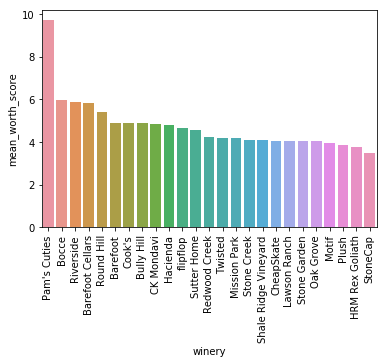

In [14]:
var_worth_plot = sns.barplot(x=top_25['winery'], y=top_25['mean_worth_score'])
for label in var_worth_plot.get_xticklabels():
    label.set_rotation(90)

I'm a bit suspicious of the Pam's Cuties winery having that much higher of a mean worth it score than the second highest holder. Perhaps we can see how many times Pam's Cuties shows up in the data to see if this high mean worth score was purely due to chance.

In [15]:
print('Number of occurences: {}'.format(table['winery'].loc[table['winery'] == 'Pam\'s Cuties'].count()))

Number of occurences: 1


As I suspected, Pam's Cuties only appears in the dataset 1 time. This is a sign that we should probably filter out wineries that have less than a certain number of occurrences in the data. We can determine this number by finding the trimmed mean number of times any winery appears in the data. 
#### Not sure if below should be done.
The trimmed mean is found by removing the first n% (in our case, n=10) of the lower and upper values of the data and getting the mean of the resulting subset. Using this type of mean is usually more effective, as the outliers in the data don't affect the trimmed mean as much as a normal mean.

In [16]:
winery_counts = table['winery'].value_counts()
winery_counts

Williams Selyem          195
Testarossa               162
Columbia Crest           149
Kendall-Jackson          124
Chateau Ste. Michelle    110
Gary Farrell              95
Concannon                 89
De Loach                  88
Cameron Hughes            84
Iron Horse                84
Morgan                    80
Robert Mondavi            73
Peachy Canyon             69
Dutton-Goldfield          69
Dry Creek Vineyard        67
Adelaida                  67
J. Lohr                   67
Marimar Estate            66
Rosenblum                 66
Sineann                   62
Calera                    61
Raymond                   61
Rodney Strong             61
Martin Ray                61
Thomas Fogarty            61
Joseph Swan Vineyards     61
Foxen                     60
Kenwood                   60
Beringer                  58
K Vintners                56
                        ... 
Cast                       1
Marshall                   1
WindVane                   1
Twisted       

In [34]:
print('Mean number of winery occurences: {}'.format(winery_counts.mean()))

Mean number of winery occurences: 7.488070692194404


We can now remove any wineries that appear less than 7 times throughout the data.

In [18]:
wineries_kept = set()
for winery in winery_counts.index:
    if winery_counts[winery] >= 7:
        wineries_kept.add(winery)
wineries_kept

{'Cosentino',
 'Forth',
 'Barrister',
 'Bonny Doon',
 'Rex Hill',
 'Ballatore',
 'Kazmer & Blaise',
 'J Vineyards & Winery',
 'JC Cellars',
 'Nodland',
 'Easton',
 'Sylvester',
 'Hendry',
 'Villa Mt. Eden',
 'Roshambo',
 'Pindar Vineyards',
 'Two Vintners',
 'Obelisco Estate',
 'Dominus',
 'Jaffurs',
 'Alma Rosa',
 'Patricia Green Cellars',
 'Tantara',
 'Saxum',
 "L'Ecole No. 41",
 'Rutherford Ranch',
 'Charles Krug',
 'Folie à Deux',
 'Dowsett Family',
 'Murphy-Goode',
 'Bruliam',
 'Kokomo',
 'Big Basin',
 'Field Stone',
 'Des Voigne Cellars',
 'De Tierra',
 'Madrigal',
 'Bella',
 'Keller Estate',
 'Belhurst',
 'Palmina',
 'St. Clement',
 'Sbragia',
 'Chandler Reach',
 'Spelletich Cellars',
 'Dutton-Goldfield',
 'Betz Family',
 'Trinchero',
 'Flowers',
 'Knights Bridge',
 'Gary Farrell',
 'Lorenzi Estate',
 'Torii Mor',
 'Darcie Kent Vineyards',
 'Sean Minor',
 'Sanguis',
 'àMaurice',
 'Baileyana',
 'Troon',
 'Peconic Bay Winery',
 'Melrose',
 'Michael Pozzan',
 'Harrington',
 'Terlat

In [19]:
table = table.loc[table['winery'].isin(wineries_kept)]

In [20]:
len(wineries_kept)

1031

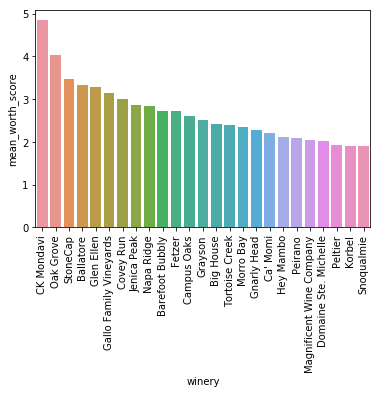

In [21]:
top_25 = get_top_25()

var_worth_plot = sns.barplot(x=top_25['winery'], y=top_25['mean_worth_score'])
for label in var_worth_plot.get_xticklabels():
    label.set_rotation(90)

In [22]:
# varieties_enough = set()
# for variety in varieties_counts.index:
#     if varieties_counts[variety] >= 100:
#         varieties_enough.add(variety)
# print(type(table['variety']))
# table = table.loc[table['variety'].isin(varieties_enough)]
# table.reset_index(inplace=True)
# table.drop(columns=['index'], inplace=True)
# table

In [23]:
# table['variety'].value_counts().plot(kind='bar', rot=0)
# plt.xticks(rotation=90)

In [24]:
# varieties = {}

To train our model, we are going to have to convert all of our categorical features (i.e. text) into continuous features (i.e. numbers). This is a very common process that is performed for training Machine Learning models, as features are often categorical in datasets. Machine Learning algorithms work purely with numbers to perform various tasks such as regression (e.g. predicting housing prices when given the square footage and location of a house) and classification (e.g. predicting whether or not a tumor is malignant, given the mass of the tumor). We will convert all of the categorical features except for the description feature, which we will touch on this in a bit.

In [25]:
# to_discretize = ['country', 'province', 'region_1', 'region_2', 'winery', 'designation', 'variety']

# for col_name in to_discretize:
#     table[col_name] = table[col_name].astype('category')

In [26]:
# cat_columns = table.select_dtypes(['category']).columns
# table[cat_columns] = table[cat_columns].apply(lambda x: x.cat.codes)
# table.head()

Taking another look at our data, I am highly suspicious of there being a correlation between the price of a wine and the number of points it receives. We can plot a graph of these two variables to get an idea of their relationship.

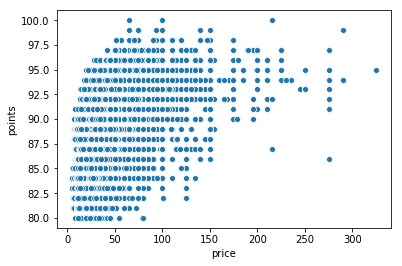

In [27]:
# sns.scatterplot(x=table['price'], y=table['points'])

It looks like there are some outliers that are distorting the graph. We can remove them and then plot the graph again.

In [28]:
# table = table[np.abs(table['points'] - table['points'].mean()) <= (3*table['points'].std())]
# table = table[np.abs(table['price'] - table['price'].mean()) <= (3*table['price'].std())]

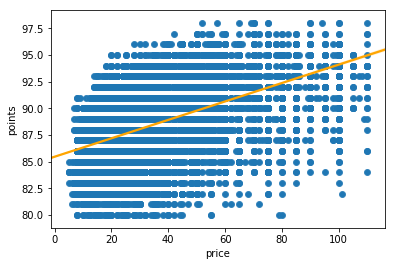

In [29]:
# sns.scatterplot(x=table['price'], y=table['points'])
# sns.regplot(x=table['price'], y=table['points'], line_kws={'color': 'orange'})

It looks like there is a rough linear relationship between the price of a wine and the number of points it receives from a review.
We can see how correlated these two continuous variables are by finding the Pearson Correlation Coefficient between them.

In [30]:
# stats.pearsonr(x=table['price'], y=table['points'])[0]

0.49264881633903235

A Pearson Correlation Coefficient value of 0.488 means that there is a moderate positive relationship between the price and points of a wine (a value of 1 would represent a positive relationship and a value of -1 would represent a negative relationship). We can see how much the number of points increases on average for every dollar added to the price.

In [31]:
# res = sm.OLS(table['price'], table['points']).fit()
# print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 7.751e+04
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        19:23:30   Log-Likelihood:                -83813.
No. Observations:               19364   AIC:                         1.676e+05
Df Residuals:                   19363   BIC:                         1.676e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
points         0.4139      0.001    278.414      0.0

The linear regression followed the formula y = mx + b. With m being "coef" in the OLS Regression Results, the number of points a wine receives increases by 0.4133 per every dollar, on average.

In [32]:
# features = table.loc[:, 'country':'points']
# label = table['variety']